# Clasificación de clientes bancarios (Bank Marketing)



Siguiendo el esquema del caso práctico, haremos primero:

Análisis exploratorio de datos (EDA)
   - Análisis univariante
   - Análisis bivariante
   - Análisis multivariante


In [ ]:
# Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)


In [ ]:
# Mostrar gráficos dentro de Colab
%matplotlib inline

# Cargar datos (ajusta la ruta si es necesario)
df = pd.read_csv("bank-full.csv", sep=';')

print("Primeras filas del dataset:")
display(df.head())

print("Información del dataset:")
print(df.info())

print("Resumen estadístico de las variables numéricas:")
display(df.describe())

print("Valores nulos por columna:")
print(df.isna().sum())

Primeras filas del dataset:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
Resumen estadístico de las variables numéricas:


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Valores nulos por columna:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
df.describe(include="object")

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


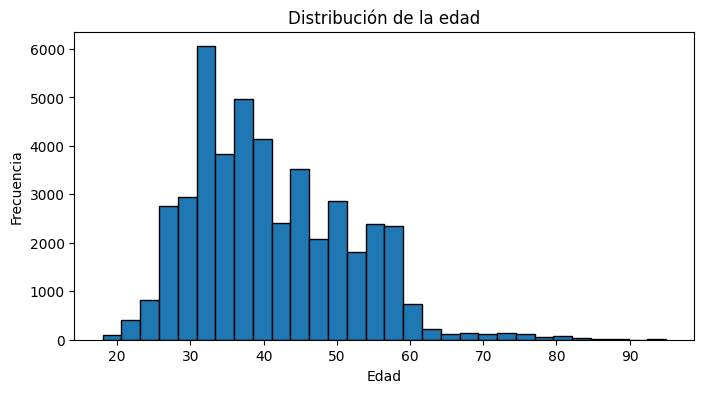

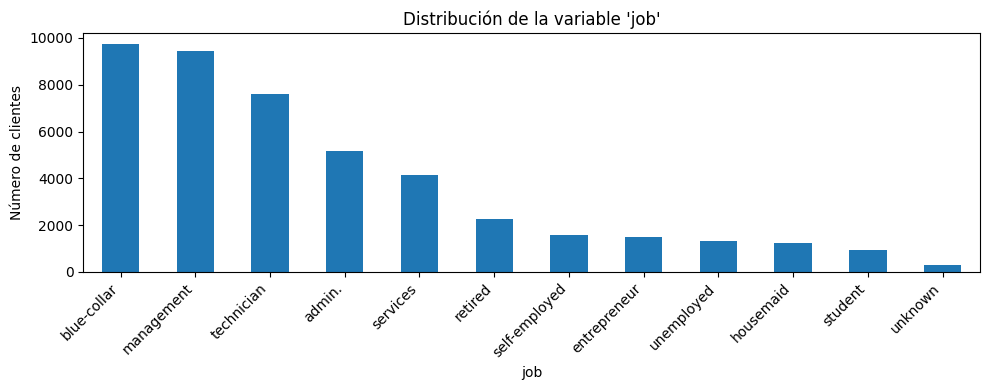

In [ ]:
#    2.1 Análisis univariante

# Histograma de la edad
plt.figure(figsize=(8,4))
plt.hist(df["age"], bins=30, edgecolor="black")
plt.title("Distribución de la edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# Distribución de la profesión
plt.figure(figsize=(10,4))
df["job"].value_counts().plot(kind="bar")
plt.title("Distribución de la variable 'job'")
plt.ylabel("Número de clientes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
# Columnas categóricas que pueden contener 'unknown'
categorical_cols_with_unknown = ['job', 'education', 'contact', 'poutcome']

print("Conteo de valores 'unknown' en el DataFrame original (df):")
for col in categorical_cols_with_unknown:
    if 'unknown' in df[col].unique():
        print(f"  '{col}': {df[col].value_counts().get('unknown', 0)}")

print("\nVerificando las columnas 'unknown' en el DataFrame df_model después de One-Hot Encoding:")
for col in categorical_cols_with_unknown:
    dummy_col_name = f"{col}_unknown"
    if dummy_col_name in df_model.columns:
        print(f"  La columna '{dummy_col_name}' existe en df_model. Suma de True (1): {df_model[dummy_col_name].sum()}")
    else:
        print(f"  La columna '{dummy_col_name}' no existe en df_model. (Puede ser que no haya 'unknown' o se haya manejado de otra forma)")

Conteo de valores 'unknown' en el DataFrame original (df):
  'job': 288
  'education': 1857
  'contact': 13020
  'poutcome': 36959

Verificando las columnas 'unknown' en el DataFrame df_model después de One-Hot Encoding:
  La columna 'job_unknown' existe en df_model. Suma de True (1): 288
  La columna 'education_unknown' existe en df_model. Suma de True (1): 1857
  La columna 'contact_unknown' existe en df_model. Suma de True (1): 13020
  La columna 'poutcome_unknown' existe en df_model. Suma de True (1): 36959


In [ ]:
print("Información del DataFrame df_model (incluyendo columnas de meses codificadas):")
df_model.info()

Información del DataFrame df_model (incluyendo columnas de meses codificadas):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_blue-collar      45211 non-null  bool 
 12  job_entrepreneur     45211 non-null  bool 
 13  job_housemaid        45211 non-null  bool 
 14  job_management       45211 non-null  bo

In [ ]:
print("Primeras filas de las columnas 'month_' en df_model:")
display(df_model.filter(like='month_').head())

Primeras filas de las columnas 'month_' en df_model:


,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False


<Figure size 800x500 with 0 Axes>

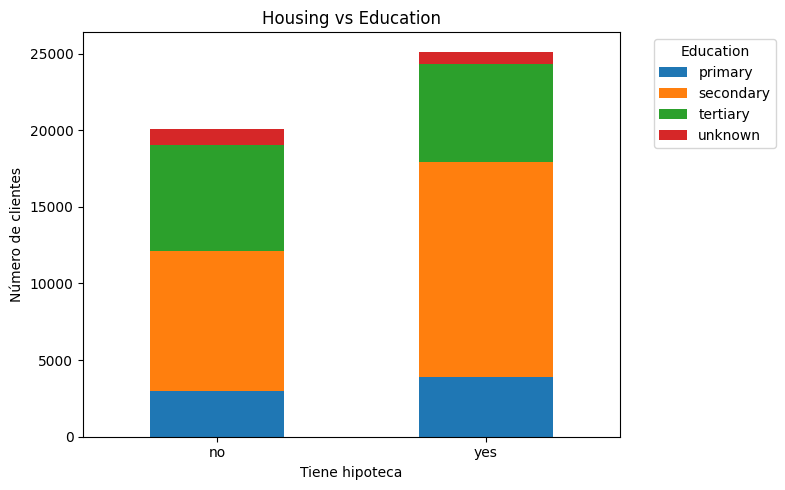

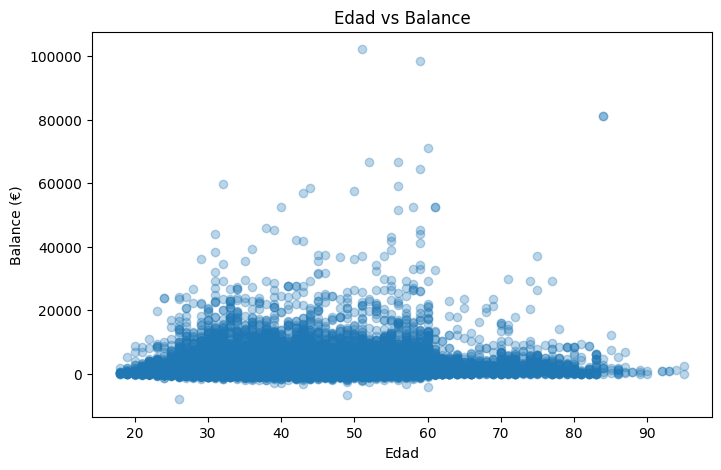

In [ ]:
# 2.2 Análisis bivariante
# Gráfico de barras apiladas: housing vs education
plt.figure(figsize=(8,5))
pd.crosstab(df["housing"], df["education"]).plot(
    kind="bar", stacked=True, figsize=(8,5)
)
plt.title("Housing vs Education")
plt.xlabel("Tiene hipoteca")
plt.ylabel("Número de clientes")
plt.xticks(rotation=0)
plt.legend(title="Education", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Diagrama de dispersión: age vs balance
plt.figure(figsize=(8,5))
plt.scatter(df["age"], df["balance"], alpha=0.3)
plt.title("Edad vs Balance")
plt.xlabel("Edad")
plt.ylabel("Balance (€)")
plt.show()

In [ ]:
# Tabla de contingencia: marital vs loan
pd.crosstab(df["marital"], df["loan"])


loan,no,yes
marital,,
divorced,4286,921
married,22554,4660
single,11127,1663


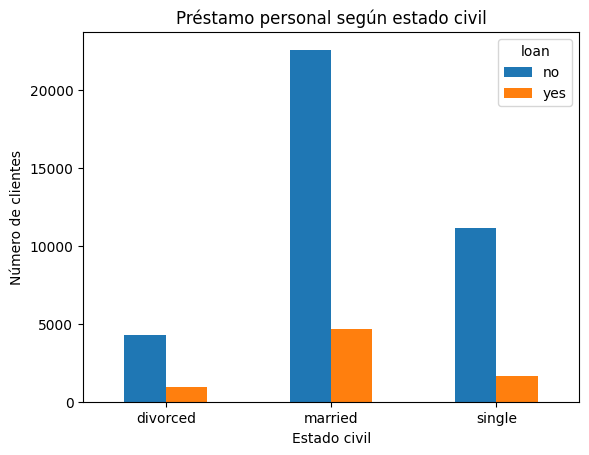

In [ ]:
pd.crosstab(df["marital"], df["loan"]).plot(kind="bar")
plt.title("Préstamo personal según estado civil")
plt.xlabel("Estado civil")
plt.ylabel("Número de clientes")
plt.xticks(rotation=0)
plt.show()


Se observa que los clientes casados solicitan préstamos personales en mayor número absoluto que los clientes solteros

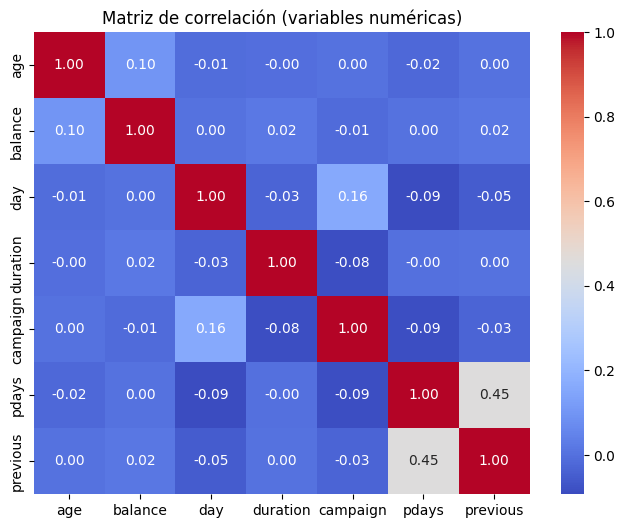

In [ ]:
# 2.3 Análisis multivariante
# Hacemos matriz de correlacion
numeric_cols = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]
corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación (variables numéricas)")
plt.show()



# Preparación de los datos

- Comprobación de valores nulos.
- Transformación de variables categóricas:
- Variables binarias
- Variables categóricas sin orden
- Definición de la variable objetivo

In [ ]:
# Copia del dataset original
df_model = df.copy()

# 1. Comprobación de valores nulos
df_model.isna().sum()

# 2. Definición de la variable objetivo (y)
df_model["y"] = (df_model["y"] == "yes").astype(int)

# 3. Transformación de variables binarias (yes / no)
binary_map = {"no": 0, "yes": 1}
for col in ["default", "housing", "loan"]:
    df_model[col] = df_model[col].map(binary_map)

# 4. Transformación de variables categóricas sin orden (one-hot encoding)
df_model = pd.get_dummies(columns= ["job", "marital", "education", "contact", "month", "poutcome"],
                          data=df_model, drop_first=1)

# Comprobación final
df_model.head()


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
1,44,0,29,1,0,5,151,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
2,33,0,2,1,1,5,76,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
3,47,0,1506,1,0,5,92,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
4,33,0,1,0,0,5,198,1,-1,0,...,False,False,False,True,False,False,False,False,False,True


# Train/Test
Separaremos los datos en conjunto de entrenamiento (70%) y test (30%)

In [ ]:
# Definimos las variables X (features) y 'y' (target)
X = df_model.drop('y', axis=1)
y = df_model['y']

# Hacemos la división
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Entrenamiento del modelo

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo
model = DecisionTreeClassifier()

# Entrenar
model.fit(X_train, y_train)


DecisionTreeClassifier()

# Evaluación del proyecto

In [ ]:
y_pred=model.predict(X_test)

In [ ]:

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[11084   893]
 [  861   726]]


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8706871129460336


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11977
           1       0.45      0.46      0.45      1587

    accuracy                           0.87     13564
   macro avg       0.69      0.69      0.69     13564
weighted avg       0.87      0.87      0.87     13564



# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
# Aplicar SMOTE solo en el conjunto de train
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [ ]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_train_sm))


Counter({0: 27945, 1: 3702})
Counter({0: 27945, 1: 27945})


In [ ]:

model_sm = DecisionTreeClassifier(max_depth=3)
model_sm.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_pred_sm = model_sm.predict(X_test)


In [ ]:
print(confusion_matrix(y_test, y_pred_sm))

[[8555 3422]
 [ 241 1346]]


In [ ]:
print(classification_report(y_test, y_pred_sm))

              precision    recall  f1-score   support

           0       0.97      0.71      0.82     11977
           1       0.28      0.85      0.42      1587

    accuracy                           0.73     13564
   macro avg       0.63      0.78      0.62     13564
weighted avg       0.89      0.73      0.78     13564

